# Missing Data in Pandas

In [2]:
import pandas as pd
import numpy as np

In [4]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
68.3 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.44 ms ± 58 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



numpy 배열의 dtype에 따라 연산 속도 차이 발생. int가 object보다 훨씬 빠르다.

In [5]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [7]:
vals1.sum() # None값이 있기에 Error

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

## $NaN$의 경우 : Missing Numerical Data

In [8]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [9]:
1 + np.nan

nan

In [11]:
0 *  np.nan

nan

In [12]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [14]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2) # NaN을 무시하고 계산

(8.0, 1.0, 4.0)

## Pandas에서 NaN 과 None

In [15]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [16]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [17]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

# Null값 연산자

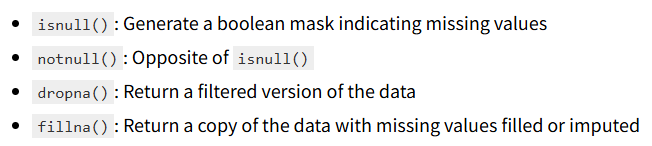

### Null값 감지

In [55]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [19]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Null값 드랍

In [ ]:
data.dropna()

0        1
2    hello
dtype: object

In [21]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
df.dropna() # row방향으로 Null값 드랍

,0,1,2
1,2.0,3.0,5


In [24]:
df.dropna(axis='columns') # column방향으로 Null값 드랍

,2
0,2
1,5
2,6


In [28]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis='columns', how='all') # 모두 Null인 column 드랍

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [54]:
df.dropna(axis='rows', thresh=3) # 최소 thresh개의 non-null값이 있는 row만 남김

,0,1,2,3
1,2.0,3.0,5,NaN


### Null값 채우기

In [56]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [57]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64